<a id='1'></a>
## _Import Libraries and Load Data_

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
pd.options.display.max_columns = None

In [2]:
tweet = pd.read_csv('TwitterHate.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
tweet.drop('id',axis=1,inplace=True)

In [4]:
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['tweet']

462


'i am brilliant. #i_am #positive #affirmation     '

In [5]:
df = tweet.copy()

<a id='2'></a>
## _Text Cleaning_

<a name='2-1'></a>
### _Handle Diacritics using text normalization_

In [6]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [7]:
df['tweet'] = df['tweet'].apply(simplify)

<a id='2-2'></a>
### _Remove user handles_

In [8]:
sample = "and @user1 i would like you to discuss with @user2 and then with @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@user1', '@user2', '@username3']

In [9]:
df['tweet'].replace(r'@\w+','',regex=True,inplace=True)

<a id='2-3'></a>
### _Remove the urls_

In [10]:
sample = "https://www.machinelearing.com prakhar and https://www.simple.com"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://www.machinelearing.com', 'https://www.simple.com']

In [11]:
df['tweet'].replace(r'http\S+','',regex=True,inplace=True)

<a id='2-4'></a>
### _Tokenize using tweet tokenizer_

In [12]:
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [13]:
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [14]:
df.head(3)

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"


<a id='2-5'></a>
### _Remove Stopwords_


In [15]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
additional_list = ['amp','rt','u',"can't",'ur']
for words in additional_list:
    stop_words.append(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stop_words[-10:]

["weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur']

In [17]:
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text    

In [18]:
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [19]:
df['tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, use, cause, offer, whe...
2                                    [bihday, majesty]
3                  [#model, love, take, time, !, !, !]
4                [factsguide, :, society, #motivation]
Name: tweet, dtype: object

<a id='2-6'></a>
### _Spelling corrections_

In [20]:
from textblob import TextBlob
sample = 'amazng man you did it finallyy'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

amazing man you did it finally


In [21]:
from textblob import TextBlob
def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text
    

<a id='2-7'></a>
### _Remove # symbols while retaining the text_

In [22]:
sample = '#winner #machine i am learning'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'winner machine i am learning'

In [23]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)    

In [24]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [25]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


<a id='2-8'></a>
### _Remove single and double length characters_

In [26]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text       
    

In [27]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [28]:
df.head(2)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...


In [29]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [30]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


<a id='2-9'></a>
### _Remove digits_

In [31]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [32]:
df['tweet'] = df['tweet'].apply(rem_digits)

In [33]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [34]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


<a id='2-10'></a>
### _Remove special characters_


In [35]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [36]:
#remove the non alpha numeric characters from the tweet tokens
df['tweet'] = df['tweet'].apply(rem_nonalpha)

<a id='3'></a>
## _Exploratory Data Analysis - Broad Approach_

<a id='3-1'></a>
### _Check for data balance_

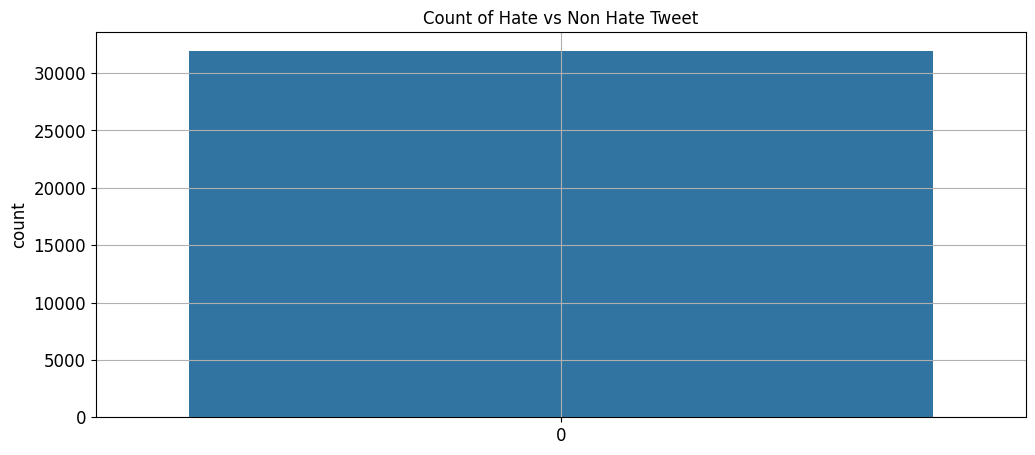

In [37]:
#plot of the count of hate and non hate tweet
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

_There are more non hatespeeches than the hatespeech in the dataset_

<a id='3-2'></a>
### _Check out the top terms in the tweets_

In [38]:
from collections import Counter
results = Counter()
df['tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('love', 2762), ('day', 2319), ('happy', 1679), ('like', 1160), ('time', 1138), ('life', 1124), ('today', 1017), ('new', 994), ('thankful', 947), ('positive', 931)]


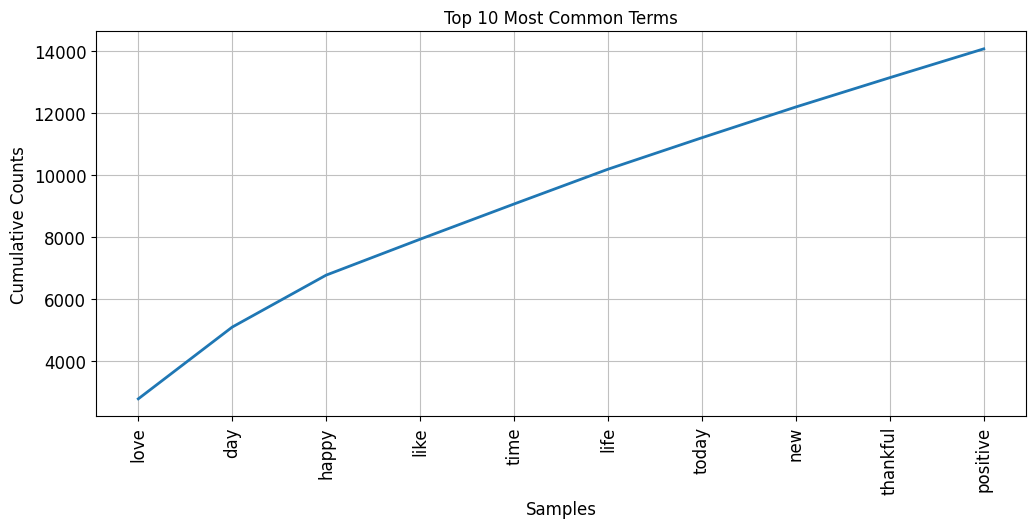

In [39]:
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

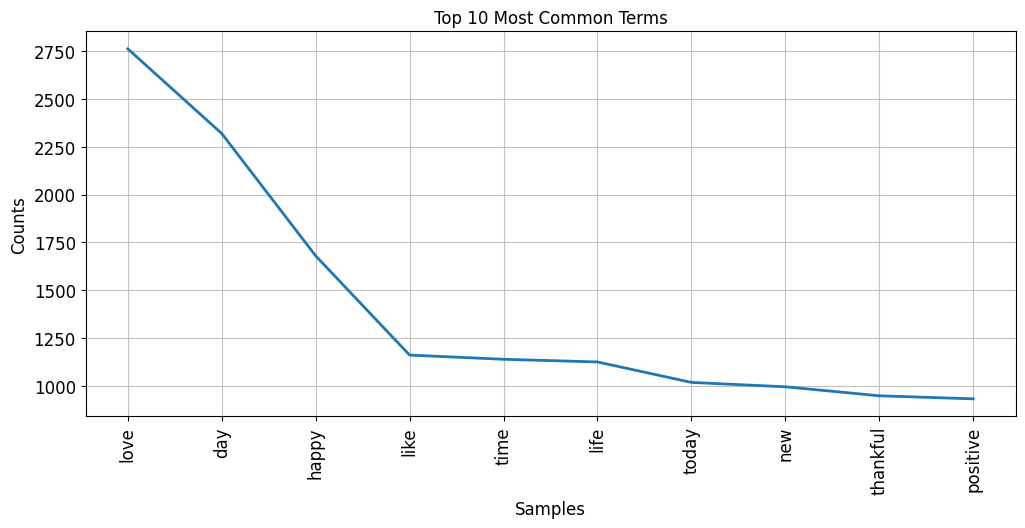

In [40]:
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

<a id='4'></a>
## _Predictive Modeling_

In [41]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [42]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [43]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [44]:
df.head(3)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty


In [45]:
X = df['tweet']
y = df['label']

In [46]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
vectorizer = TfidfVectorizer(max_features=5000)

In [49]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [50]:
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [52]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

<a id='4-4'></a>
### _Model evaluation_



In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.95569
Accuracy Score on test set 0.94791


In [55]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.96      0.96      0.95     25569



In [56]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.90      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.93      0.64      0.70      6393
weighted avg       0.95      0.95      0.94      6393



_The model's f1-score is low for label 1 which indicates the hate text in the twitter_

In [57]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<a id='4-6'></a>
### _Regularization and Hyperparameter tuning:_

In [58]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [59]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [60]:
#check the search space 
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000268E9412E30>}


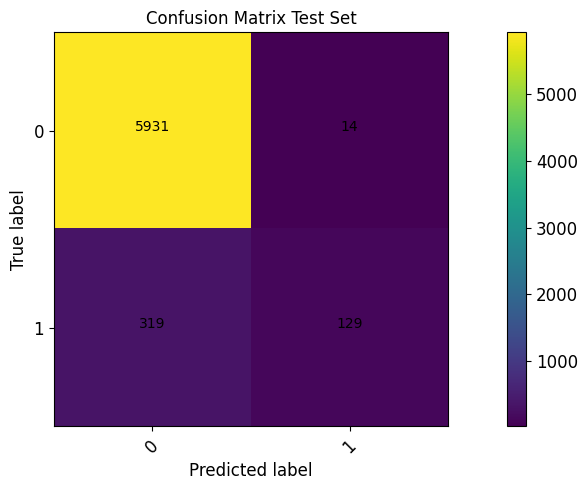

In [61]:
import itertools
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix Test Set')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()